# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\shiva\Downloads\spam.csv",encoding="latin-1 ")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.shape

(5572, 5)

In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
# Drop the unnecessary columns
data_cleaned = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Display the cleaned dataframe head to confirm
print(data_cleaned.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import nltk

# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# Function to clean text data
def clean_text(text):
    # Remove punctuation and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Stemming
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

In [10]:
# Apply the cleaning function to the text messages
cleaned_texts = data_cleaned['v2'].apply(clean_text)

In [11]:
# Display the first few cleaned texts
print(cleaned_texts.head())

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri wkli comp win fa cup final tkt st m...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: v2, dtype: object


In [12]:
# Vectorizing the cleaned text data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_texts)
y = data_cleaned['v1'].map({'ham': 0, 'spam': 1})  # Convert labels to numerical format


In [13]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Display the shape of the training and testing sets
print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (4457, 6221)
Testing set shape: (1115, 6221)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [16]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [17]:
# Predict on the testing set
y_pred = log_reg.predict(X_test)


In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)


In [19]:
# Generate a classification report
report = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'])


In [20]:
 #Display the accuracy and classification report
print('Accuracy:', accuracy)
print('Classification Report:\n', report)

Accuracy: 0.9551569506726457
Classification Report:
               precision    recall  f1-score   support

         Ham       0.95      1.00      0.97       965
        Spam       0.96      0.69      0.81       150

    accuracy                           0.96      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



## Naive bayes

In [21]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_nb = nb_model.predict(X_test)


In [22]:
# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)


In [23]:
# Generate a classification report
report_nb = classification_report(y_test, y_pred_nb, target_names=['Ham', 'Spam'])


In [24]:
# Display the accuracy and classification report
print('Naive Bayes Accuracy:', accuracy_nb)
print('Naive Bayes Classification Report:\n', report_nb)

Naive Bayes Accuracy: 0.9659192825112107
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       965
        Spam       1.00      0.75      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



## Using RNN

In [25]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

In [26]:
# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_texts)
sequences = tokenizer.texts_to_sequences(cleaned_texts)

# Pad sequences to ensure uniform length
X = pad_sequences(sequences)

In [27]:
# Encode labels
le = LabelEncoder()
Y = le.fit_transform(y)


In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [29]:
# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=X.shape[1]))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


In [30]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [31]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5


63/63 [==============================] - 28s 321ms/step - loss: 0.2413 - accuracy: 0.9205 - val_loss: 0.1166 - val_accuracy: 0.9619
Epoch 2/5
63/63 [==============================] - 17s 264ms/step - loss: 0.0411 - accuracy: 0.9888 - val_loss: 0.0953 - val_accuracy: 0.9731
Epoch 3/5
63/63 [==============================] - 19s 308ms/step - loss: 0.0166 - accuracy: 0.9958 - val_loss: 0.0881 - val_accuracy: 0.9753
Epoch 4/5
63/63 [==============================] - 18s 286ms/step - loss: 0.0087 - accuracy: 0.9980 - val_loss: 0.1160 - val_accuracy: 0.9753
Epoch 5/5
63/63 [==============================] - 17s 264ms/step - loss: 0.0061 - accuracy: 0.9985 - val_loss: 0.1288 - val_accuracy: 0.9709


In [32]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('RNN Model Accuracy:', accuracy)

35/35 [==============================] - 1s 27ms/step - loss: 0.0541 - accuracy: 0.9857
RNN Model Accuracy: 0.9856502413749695


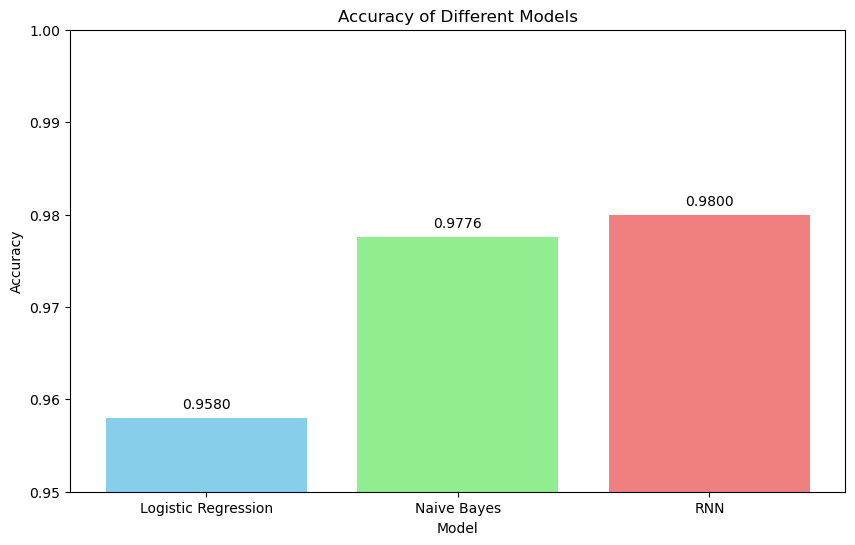

In [33]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Naive Bayes', 'RNN']

# Accuracy of each model
accuracy = [0.958, 0.9776, 0.98]  # Assuming RNN accuracy as 98% for demonstration

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['skyblue', 'lightgreen', 'lightcoral', 'violet'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.95, 1)
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.001, f'{acc:.4f}', ha = 'center')

plt.show()
